In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

# Psedorandom number generators

While psuedorandom numbers are generated by a deterministic algorithm, we can mostly treat them as if they were true random numbers and we will drop the “pseudo” prefix. Fundamentally, the algorithm generates random integers which are then normalized to give a floating point number from the standard uniform distribution. Random numbers from other distributions are in turn generated using these uniform random deviates, see later.

## Linear congruential generators (LCG)

[LCG](https://en.wikipedia.org/wiki/Linear_congruential_generator) is among the simplest and most popular pseudo random number generators. It relies on the recursive and fully deterministic relation:

$$
z_{i+1}=(a z_i+c)\mod{m}
$$

Hull-Dobell Theorem: The LCG will have a period $m$ for all seeds if and only if

* $c$ and $m$ are relatively prime,
* $a−1$ is divisible by all prime factors of $m$
* $a−1$ is a multiple of 4 if $m$ is a multiple of $4$.

The number $z_0$ is called the *seed*, and setting it allows us to have a reproducible sequence of (pseudo) random numbers. The LCG is typically coded to return $z/m$, a floating point number in $(0, 1)$. Obviosuly, this can be easily scaled to any other range $(a,b)$.
Note that $z \le m-1$ always holds, the yielded $z/m$ result is thus on purpose strictly smaller than 1. 



In [2]:
def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 1234

In [3]:
[lcg() for i in range(10)]

[0.0543,
 0.0299,
 0.0200,
 0.1942,
 0.8637,
 0.9932,
 0.3973,
 0.7836,
 0.6981,
 0.7172]

0.506814302788116
0.2950998547688669 0.2886751345948129


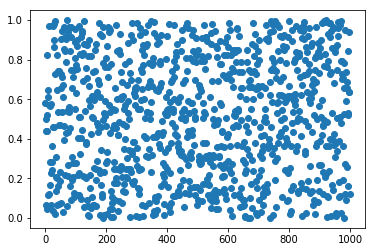

In [4]:
rn=[lcg() for i in range(1000)]
print (np.mean(rn))
print (np.std(rn),1/np.sqrt(12))
plt.plot(rn,"o")


## Example: the central limit theorem


The sum (and thus the mean if you divide the sum by the $n$) of $n$ i.i.d. variables (regardless their probability distribution) is normally distributed. Check [this video](https://www.youtube.com/watch?v=zeJD6dqJ5lo) for more. 


In [15]:
# option 1
#intervals = list(range(6+1)) # uniform distribution
# option 2
intervals = [0,1.5,2,3,4,4.5,6] # a non-uniform distribution

number_of_outcomes = len(intervals)-1 # the spectrum

# the number of dice
number_of_dice = 10

# the number of tosses
N=100000

In [16]:
data = []
results = []
# tossing the dice N times
for toss in range(0,N):
    # tossing the set of dice
    result = np.digitize([lcg()*number_of_outcomes for i in range(number_of_dice)], intervals)
    results.extend(result)
    data.append(np.sum(result))

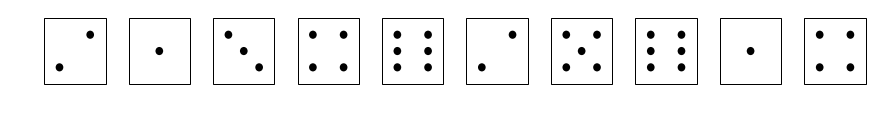

In [17]:
# Draw the dice
fig, axs = plt.subplots(1, number_of_dice, figsize=(15, 1.5), sharey=True)
faces = {
    1:[(0.5, 0.5)],
    2:[(0.3, 0.3),(0.7, 0.7)],
    3:[(0.3, 0.7),(0.5, 0.5),(0.7, 0.3)],
    4:[(0.3, 0.3),(0.7, 0.3), (0.3, 0.7), (0.7, 0.7)],
    5:[(0.3, 0.3),(0.7, 0.3), (0.3, 0.7), (0.5, 0.5), (0.7, 0.7)],
    6:[(0.3, 0.3),(0.3, 0.5), (0.3, 0.7), (0.7, 0.3), (0.7, 0.5), (0.7, 0.7)]
}
for i,ax in enumerate(axs): 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    # Draw the die face
    die_face = plt.Rectangle((0.1, 0.1), 0.8, 0.8, facecolor='white', edgecolor='black')
    ax.add_patch(die_face)
    # Draw the dots on the die face
    dot_radius = 0.05
    for dot_pos in faces[result[i]]:
        dot = plt.Circle(dot_pos, dot_radius, facecolor='black')
        ax.add_patch(dot)
    ax.axis('off')
plt.subplots_adjust(wspace=0.1)
plt.show()

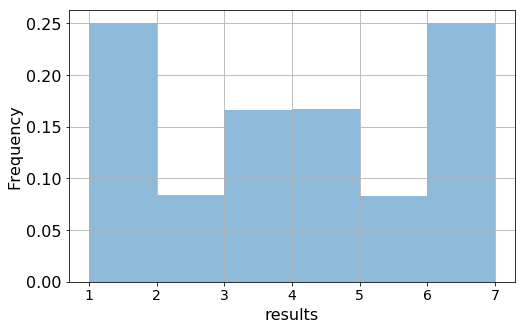

In [18]:
# Draw the p.m.f of the dice outcome
plt.figure(figsize=(8,5))

plt.hist(results, bins=range(1,8), density=True, alpha=0.5, label='simulation')
plt.xlabel('results', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
#plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')

In [19]:
# the moments (to be used for normalization)
mu = np.mean(results)
sigma = np.std(results)
print (mu, sigma)

3.49914 1.8939095174796499


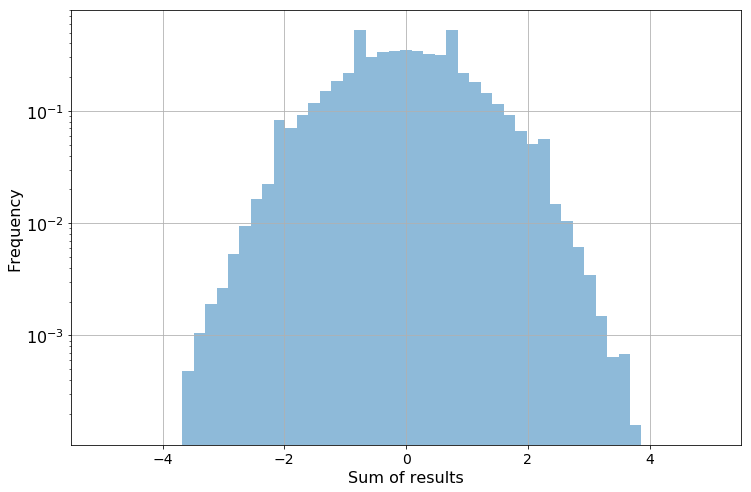

In [20]:
# Draw the normalized distribution of the sum of the 10 dice tossing outcomes 
plt.figure(figsize=(12,8))
nbins=6
data_rescaled = (data-mu*number_of_dice)/(sigma*np.sqrt(number_of_dice))
plt.hist(data_rescaled, 
         bins=53, range=[-5,5],
         #bins = [(i-5*nbins)/nbins for i in range(2*5*(nbins)+1)],
         density=True, alpha=0.5, label='simulation',
         log=True)
plt.xlabel('Sum of results', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
#plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')

Exercise: fit with a gaussian the distribution you just got.


### Beyond LCG

LCG though is not sufficiently "random" for several complex modern applications. There are nowadays better performing algorithms, like [Mersenne twister](https://en.wikipedia.org/wiki/Mersenne_Twister), a generalized feedback shift-register generator, is used, in particular the numpy random package features it.

Numpy uses as default [PCG-64](https://numpy.org/doc/stable/reference/random/bit_generators/index.html) of the [PCG family](https://www.pcg-random.org/), which are considered the ultimate random number generators.



## Python libraries for Random Number Generation 

There are two modules for (pseudo) random numbers that are commonly used. When all you need is to generate random numbers from some distribution, the `numpy.random` moodule is the simplest to use. When you need more information realted to a distribution such as quantiles or the PDF, you can use the `scipy.stats` module.

In [21]:
import numpy.random as npr
npr.seed(143) # fix seed for reproducible result

### Random data

In [22]:
# random values from a uniform distrubtion in [0.0, 1.0) for a given shape
print ("uniform:",'\n', npr.rand(3,4),'\n') # shape=(3,4)
 
# random values from a standard normal distrubtion  for a given shape
print ("normal:",'\n', npr.randn(2,5),'\n') # shape=(2,5)

# random integers between "low" and "high" edges for a given shape (size)
print ("integers:",'\n', npr.randint(1,50,size=(3,6)),'\n') # shape=(3,6)

uniform: 
 [[0.7378 0.34   0.4681 0.4239]
 [0.5683 0.8813 0.0331 0.0088]
 [0.1992 0.1673 0.969  0.0566]] 

normal: 
 [[-0.2516 -0.4686 -0.6736  0.1714 -1.8427]
 [ 0.7976 -0.4144 -0.2424 -0.6527  0.2567]] 

integers: 
 [[34 19 19  7 22 31]
 [ 7 17 38 40  8 21]
 [18 10 27 47 41  4]] 



### A more recent implementation

As of NumPy 1.17.0, a new random number generation system was introduced, which separates the random generator (bit generator) from the random number distribution. This is handled through the `numpy.random.BitGenerator` and `numpy.random.Generator` classes.

* BitGenerator: the actual algorithm that generates raw random bits. Options include PCG64, Philox, and SFC64, in addition to MT19937 (Mersenne Twister).
* Generator: a user-friendly interface built on top of a BitGenerator. It interprets the raw random bits provided by the BitGenerator and transforms them into numbers following specific distributions .

For most users, you'll work with Generator because it provides all the tools for generating random numbers in a user-friendly way. The BitGenerator is there under the hood, providing the raw randomness. You only need to care about BitGenerator if you're customizing the random number generation process (e.g., switching to a specific algorithm for performance reasons).

In [25]:
from numpy.random import Generator, PCG64

bit_gen = PCG64(seed=42)  # Create a BitGenerator
rng = Generator(bit_gen)  # Wrap the BitGenerator with a Generator

print(rng.random(3))  # Generate 3 random numbers in [0, 1)
print(rng.normal(loc=0, scale=1, size=3))  # Samples from a normal distribution


ImportError: cannot import name 'Generator'

### Operations on arrays

In [24]:
# randomly shuffling a vector
x = np.arange(10)
npr.shuffle(x)
print ("reshuffling:",'\n', x,'\n')
# npr.permutation works similarly

# Generates a random sample from a given 1-D array (without replacement)
x = np.arange(10,20)
print ("choice w/o replace",'\n',npr.choice(x, 5, replace=False),'\n')

# Generates a random sample of a given dimension from a given 1-D array
print ("choice w/ replace",'\n',npr.choice(x, (5, 7), replace=True),'\n') # this is default

reshuffling: 
 [6 0 3 1 8 5 2 9 4 7] 

choice w/o replace 
 [13 17 10 14 18] 

choice w/ replace 
 [[16 18 17 13 12 18 14]
 [13 17 19 19 11 10 11]
 [11 18 16 19 18 14 16]
 [13 10 17 16 18 11 12]
 [11 18 16 12 12 15 13]] 



## Probability Density Functions

numbers can be drawn from basically any common PDF (normal, binomial, chisquare, etc..)

In [26]:
# exponential
print ("exponential:",'\n', npr.exponential(10, size=(3,2)),'\n')

exponential: 
 [[17.4746  1.8033]
 [ 5.3176  7.7107]
 [ 7.8081 11.7676]] 



In [27]:
# tossing a dice (the easy way..)
roll = 1./6
x = npr.multinomial(20000, [roll]*6, size=2)
print ("frequencies of 6-faces dice tossing (two players):",'\n', x)

frequencies of 6-faces dice tossing (two players): 
 [[3312 3410 3241 3274 3430 3333]
 [3410 3323 3349 3403 3251 3264]]


Let's pretend we haven't seen any of the above functionalties available in numpy and scipy and walk through the basics..

# Non-uniform random numbers

In several cases the actual random process occur with non-uniform probability, i.e. with a given probability density function (pdf), different from the uniform distribution. Several methods are available, we will see a few of them

### Inverse transform method

Let'start from a uniform distribution $u(z)$:

$$
\left\{
\begin{array}{ll}
      1 & 0\leq z\leq 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

and let's look for a function $x(z)$ such that $x$ is distributed accordingly to a given pdf $p(x)$. The probability to find $x$ between $x$ and $x+dx$ is equal to:

$$
p(x)dx = dz
$$

and thus:

$$
\int_{-\infty}^{x(z)} p(x') dx' = \int_0^z dz'= z
$$

If (a) we could solve the integral and (b) solve for $x$, then we are done. For most of the pdf at least one of the two is not possible.. The typical solvable analitical example is:

$$
p(x) = \mu e^{-\mu x}
$$

$$
\int_{0}^{x(z)} p(x') dx' = 1 - e^{-\mu x} = z
$$

and thus:

$$
x(z) = - \frac{1}{\mu}\log{(1-z)}
$$

In [34]:
def expon_pdf(x, mu=1):
    """PDF of exponential distribution."""
    return mu*np.exp(-mu*x)

def expon_cdf(x, mu=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-mu*x)

def expon_icdf(z, mu=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-z)/mu

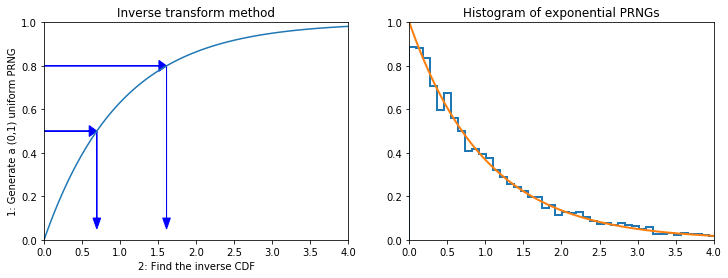

In [35]:
dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, expon_cdf(x))
plt.axis([0, 4, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('2: Find the inverse CDF')
plt.title('Inverse transform method');

plt.subplot(122)
u = np.random.random(10000)
v = expon_icdf(u)
plt.hist(v, histtype='step', bins=100, density=True, linewidth=2)
plt.plot(x, expon_pdf(x), linewidth=2)
plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs');

### Box-Muller for generating normally distributed random numbers

The inverse method is not applicable even for the gaussian distribution:

$$
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{x} \exp{-\frac{x'^2}{2\sigma^2}} dx' = z
$$

is not solvable. The trick is to consider a two dimensional gaussian function with the same $\sigma$ on both coordinates:

$$
p(x)dx \times p(y)dy = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{-\frac{x^2}{2\sigma^2}} \times \frac{1}{\sqrt{2\pi\sigma^2}} \exp{-\frac{y^2}{2\sigma^2}} = \frac{1}{2\pi\sigma^2} \exp{-\frac{(x^2+y^2)}{2\sigma^2}}dxdy
$$

which written in radial coordinates:

$$
x=r\cos{\theta};\,\,\,
y=r\sin{\theta}
$$

$$
p(r,\theta)dr d\theta = \frac{r}{\sigma^2} \exp{-\frac{r^2}{2\sigma^2}} dr \times \frac{d\theta}{2\pi} = p(r)dr \times p(\theta)d\theta
$$

with both $p(r)$ and $p(\theta)$ normalized to 1. Now, the latter is a simple uniform distribution, whereas the former is solvable:

$$
\frac{1}{\sigma^2} \int_{0}^{r} \exp{-\frac{r^2}{2\sigma^2}} rdr = z
$$

which gives:

$$
r=\sqrt{-2\sigma^2\log{1-z}}
$$


In [36]:
n = 10000
z = np.random.random(n)
theta = 2*np.pi*np.random.random(n)
r_squared = -2*np.log(z)
r = np.sqrt(r_squared)
data = pd.DataFrame({'x':r*np.cos(theta), 'y':r*np.sin(theta)})

ValueError: kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'

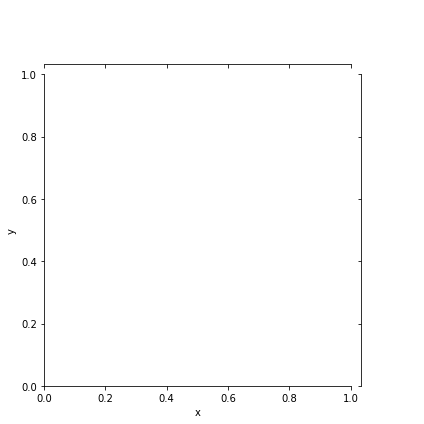

In [33]:
sns.jointplot(data=data, x='x',y='y', kind="hist")

### Creating a random number generator for arbitrary distributions

Suppose we have some random samples with an unknown distribution. We can still use the inverse transform method to create a random number generator from a random sample, by estimating the inverse CDF function using interpolation.

In [ ]:
# let's first define a function to int/ext-rapolate, by extending standard interpolation methods 
def extrap1d(interpolator):
    xs = interpolator.x  # Get the original x values
    ys = interpolator.y  # Get the original y values

    def pointwise(x):
        if x < xs[0]:  # Extrapolate to the left
            return ys[0] + (x - xs[0]) * (ys[1] - ys[0]) / (xs[1] - xs[0])
        elif x > xs[-1]:  # Extrapolate to the right
            return ys[-1] + (x - xs[-1]) * (ys[-1] - ys[-2]) / (xs[-1] - xs[-2])
        else:  # Use the original interpolator within bounds
            return interpolator(x)

    def ufunclike(xs):  # Apply pointwise logic to arrays
        return np.array(list(map(pointwise, np.array(xs))))

    return ufunclike  # Return the extended function

In [ ]:
from scipy.interpolate import interp1d
from statsmodels.distributions.empirical_distribution import ECDF

# Make up some random data
x = np.concatenate([np.random.normal(0, 1, 10000),
                    np.random.normal(4, 1, 10000)])

# the empirical cumulative distribution of x
ecdf = ECDF(x)
# ecdf.x contains the sorted data points from the input dataset x
# ecdf.y contains the cumulative probabilities for each x

# let's construct the inverse (E)CDF
inv_cdf = extrap1d(interp1d(ecdf.y, ecdf.x,
                            bounds_error=False, assume_sorted=True))

# and use it to replicate the original pdf by means of the inverse method
r = np.random.uniform(0, 1, 1000)
ys = inv_cdf(r)

plt.figure(figsize=(12,8))
plt.hist(x, 25, histtype='step', color='red', density=True, linewidth=1, label='original data')
plt.hist(ys, 25, histtype='step', color='blue', density=True, linewidth=1, label='simulated data')
plt.legend()

## Rejection sampling (Accept-reject method)

Another commmon way to sample data from a given distribution $f(x)$ is the Rejection sampling. You typically propose a more convenient distribution $g(x)$, which is easy to sample from and "covers" $f(x)$, i.e. satisfies $f(x)\le M g(x)$ for some $M$ and all $x$.

The steps are the following:
* Generate a random sample $X$ from $g(x)$
* Toss a number $U$ from the uniform distribution
* Compute the acceptance condition:
$$
U\le\frac{f(X)}{M g(X)}
$$
* if satisfied, accept X as a sample for $f(x)$ otherwise reject it and restart

Suppose we want to sample from a (truncated) Cauchy distribution (a Student-t distribution with 1 degree of freedom).
We use the uniform as a proposal distibution (highly inefficient)


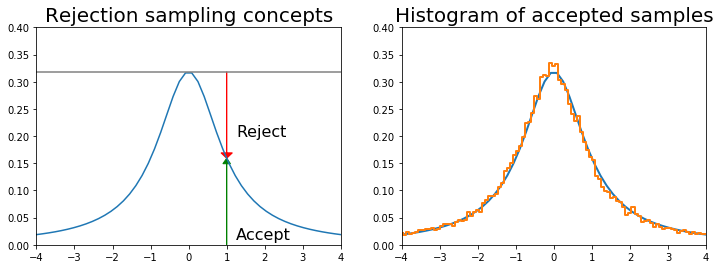

In [37]:
x = np.linspace(-4, 4)

dist = stats.cauchy()
upper = dist.pdf(0)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, dist.pdf(x))
plt.axhline(upper, color='grey')
px = 1.0
plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
         head_width=0.2, head_length=0.01, fc='g', ec='g')
plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
         head_width=0.3, head_length=0.01, fc='r', ec='r')
plt.text(px+.25, 0.2, 'Reject', fontsize=16)
plt.text(px+.25, 0.01, 'Accept', fontsize=16)
plt.axis([-4,4,0,0.4])
plt.title('Rejection sampling concepts', fontsize=20)

plt.subplot(122)
n = 100000
# generate from sampling distribution
u = np.random.uniform(-4, 4, n)
# accept-reject criterion for each point in sampling distribution
r = np.random.uniform(0, upper, n)
# accepted points will come from target (Cauchy) distribution
v = u[r < dist.pdf(u)]

plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(v, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)

plt.axis([-4,4,0,0.4])
plt.title('Histogram of accepted samples', fontsize=20);


### Mixture representations
Sometime, the target distribution  which we need to generate random numbers from can be expressed as a mixture of “simpler” distributions that we already know how to sample from

$$
f(x)=\int g(x|y)p(y)dy
$$

For example, if $y$ is drawn from the $\chi^2_\nu$ distrbution, then ${\cal N}(0,\nu/y)$ is a sample from the Student-t distribution with $\nu$ degrees fo freedom.

In [ ]:
n = 10000
df = 5
dist = stats.t(df=df)
y = stats.chi2(df=df).rvs(size=n)
r = stats.norm(0, df/y).rvs(n)


plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(v, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)

plt.axis([-4,4,0,0.4])
plt.title('Histogram of accepted samples', fontsize=20);

### Draw from an analytic pdf

Obviously scipy stats module features all possible pdf that can come to your mind. You can draw random data from each of them.

Let's plot the PDF of the Gamma function and comparing it to a histogram of randomly sampled data from the same distribution. ($a$ is the shape parameter, which controls the skewness and spread of the distribution:
small values lead to a skewed shift toward the left, large values get the distributio closer to a Gaussian)

In [ ]:
from scipy.stats import gamma
a = 1.99

# define the range by means of the percent-point function (PPF), 
# giving the the x value corresponding to a given cumulative probability
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)

# the random variable object
rv = gamma(a)

#plt.figure(figsize=(8,6))
_, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, rv.pdf(x), 'k-', lw=2)

# the random variable sample
r = gamma.rvs(a, size=10000)
_ = ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

# Monte Carlo integration

Monte Carlo integration is typically less accurate than other integration methods, but very often is the only available tool, e.g. when the integrand has very rapid variations or singular points, or, most importantly, when dealing with high dimensional integrals.

The idea is simple, let's the area under the function be $I$ whereas the all possible outcomes lay in a box of area $A$. The probability for a point to fall under the function is $p=I/A$. If we generate $N$ random points, the fraction $k$ which fall under the curve is $k/N$ and approximate $I/A$, thus:

$$
I\simeq\frac{k A}{N}
$$

Let's try this with the function $f(x) =\sin^2{\frac{1}{x(2-x)}}$

In [ ]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')

In [ ]:
# Monte Carlo integration
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print(I)

### The mean value method

Let's take the integral:

$$
I=\int_a^b f(x) dx
$$

defining $\langle f \rangle$ as the mean of $f$:

$$
\langle f \rangle = \frac{1}{b-a}\int_a^b f(x) dx
$$

and estimating $\langle f \rangle$ by uniformely probing at random the function domain, such as

$$
\langle f \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i)
$$

we get:

$$
I=\frac{b-a}{N} \sum_{i=1}^{N} f(x_i)
$$

this easily generalize to higher dimensions:

$$
I=\frac{V}{N} \sum_{i=1}^{N} f(\vec{r}_i)
$$

where the sampling points $\vec{r}_i$ are drawn uniformly at random from integration space of volume $V$.

It can be proven that the standard deviation of the method scales as $1/\sqrt{N}$:

$$
\sigma = V\frac{\sqrt{{\rm var}\, f}}{\sqrt{N}}
$$

### Importance sampling

There are several general techinques for variance reduction, sometimes known as Monte Carlo swindles since these methods improve the accuracy and convergence rate of Monte Carlo integration without increasing the number of Monte Carlo samples. *Importance sampling* is among the most commonly used.

We can define a weighted average of a function $g(x)$:

$$
\langle g_w \rangle = \frac{\int_a^b w(x) g(x)dx}{\int_a^b w(x)dx}
$$

Consider again the integral of $f(x)$:

$$
I=\int_a^b f(x)dx
$$

Setting $g(x)=f(x)/w(x)$ we have:

$$
\left\langle \frac{f(x)}{w(x)}\right\rangle = \frac{\int_a^b w(x)f(x)/w(x) )dx}{\int_a^b w(x)dx} = \frac{I}{\int_a^b w(x)dx}
$$

and thus:

$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$

which generalizes the mean value method if $w(x)$ is the uniform distribution between $a$ and $b$

### Example

Suppose we want to estimate the tail probability of ${\cal N}(0,1)$ for $x>5$. Regular MC integration using samples from ${\cal N}(0,1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling.

In [ ]:
x = np.linspace(4, 8, 100)
plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm().pdf(x))
plt.yscale('log')

In [ ]:
%precision 10
h_true =1 - stats.norm().cdf(5)
h_true

In [ ]:
n = 1000000
y = stats.norm().rvs(n)
print ("integral (sum) above 5:", np.sum(y > 5))
h_mc = 1.0/n * np.sum(y > 5)
# estimate and relative error
print ("estimate:", h_mc)
print ("relative error:", np.abs(h_mc - h_true)/h_true)

In [ ]:
n = 10000
y = stats.expon(loc=5).rvs(n)
h_is = 1.0/n * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error
print ("estimate:", h_is)
print ("relative error:", np.abs(h_is - h_true)/h_true)